🚩![example](images/director_shot.jpeg)

# 🚩Project Title

**Author:** Shawn Samuel
***

## 🚩 Overview 

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## 🚩Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired us to help them better understand the movie industry. Our team is charged with exploring what type of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

We think this is an exciting venture and the prolific amount of data that is available regarding movie production, reception and sales will be helpful in making data-driven decisions. There are a few questions we'd like to answer as we explore the data that is available. 

*One important thing as we approach this opportunity is defining what success is. In terms of popularity - there are two overarching metrics that are useful - money and reviews. These are broad and within these categories there are several nuances that influence our perspective on popularity. We will explore various aspects of this in each of the questions below.*

##### Q1: What month(s) is best to release a movie?
- **Why:** It is in Microsoft's best interest to not wait long to enter the market. However timing is key and making a movie requires careful planning and budgeting of resources and time. To that end, it's important to know when we want to take our end product to market so we can plan backwards. We believe that the particular time a movie is released has an impact on it's popularity.  
- **Success Metric:** For this question we will consider gross worldwide revenue. We're interested in finding out what month people are most willing to spend their money on watching a movie and so this is irrespective of the budget or net profit.  
- **Watch Out For:** Gross revenue builds over time and *may* not directly corelate to the timing of release. However our inclination is that initial short-term popularity will provide the momentum for certain movies to stand out in terms of ticket sales.

##### Q2: What genre(s) is the most popular in terms of voting engagement?
- **Why:** There are many different directions Microsoft could go when it comes to the content of this initial movie venture. Genre popularity provides a general understanding of what people like to watch. This understanding will help in deciding what direction to movie in terms of content that will help build the brand of Microsoft's movie venture.  
- **Success Metric:** We will consider the genre makeup of movies that garner the highest number of votes. Our thinking is that if more people are taking the time to cast a vote for a movie, it is gaining traction with viewers. We'd like to see what genres people are more likely to respond to. Our goal with this business question is getting peopel talking about Microsoft's new movie venture! This will be 
- **Watch Out For:** There are several assumptions here. It's possible that people may be voting negatively as opposed to positively. However, there's no such thing as bad press so let's discover what genres people respond to, whether good or bad.

##### Q3: 
- **Why:**
- **Success Metric:**
- **Watch Out For:**

The main pain points we forsee are two-fold. Firstly - it is a saturated market that Microsoft may be be 'jumping on the bandwagon' a bit late in the game. However, we can use the historical market data to our advantage. Secondly, the year 2020 has created a major disruption in the established methodologies of creating and consuming entertainment content, particularly movies. This may prove to be, in fact, the best time for Microsoft to enter the competition!

***

## Data Understanding

We will utilize three major data sets to obtain our informaiton for analysis. 

##### Data Set 1: The Numbers - "budgets"
- **From:** "[The Numbers](https://www.the-numbers.com/about) is a premier provider of movie industry data and research services."  
- **Contains:** Movie name, release date, production budget, domestic gross, worldwide gross

##### Data Set 2: iMDb - "titles"
- **From:** "[iMDb](https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=helpsect_cons_1_1#) is the world's most popular and authoritative source for movie, TV and celebrity content, designed to help fans explore the world of movies and shows and decide what to watch." 
- **Contains:** tconst (an identifying id), primary title, original title, start year, runtime, genres

##### Data Set 2: iMDb - "ratings"
- **From:** iMDB (see above)
- **Contains:** tconst (an identifying id), average rating, number of votes

***

In [998]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000) #view larger data tables
pd.set_option('display.max_columns', 1000) #view larger data tables
pd.set_option('display.float_format', lambda x: '%.5f' % x) #supress scientific notation

%matplotlib inline

In [999]:
# Move selected datasets to pandas dataframes
budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')
titles = pd.read_csv('data/imdb.fi.title.basics.csv.gz')
ratings = pd.read_csv('data/imdb.fi.title.ratings.csv.gz')

In [1000]:
# View .head() and .info() for each df

display(budgets.head(3))
display(budgets.info())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

In [1001]:
display(titles.head(3))
display(titles.info())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

In [1002]:
display(ratings.head(3))
display(ratings.info())

,tconst,averagerating,numvotes
0,tt10356526,8.30000,31
1,tt10384606,8.90000,559
2,tt1042974,6.40000,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

***

## 🚩Data Preparation

Below we will take action steps to prepare the data for analysis. We will manipulate as needed for each proposed question.

***
##### Q1: What month(s) is it best to release a movie?
The *tn.movies.budget* database provides us the release date as well as monetary information for movies. We are interested in the worldwide_gross as this can be an indicator of overall popularity, regardless of how much was spent in making the movie. We would like to see in what month (or months) the most movies in the top 25% grossing movies were released. We also want to look and see if there is a correlation with the release month of the bottom 25% of movies.

##### Q1: Steps to prepare data:
➡️ Check for duplicates  
☐ Extract month as a number  
☐ Convert dollar amounts from str to int

In [1003]:
budgets.shape 

(5782, 6)

In [1004]:
budgets.duplicated().sum() #check for duplicates

0

In [1005]:
budgets['movie'].duplicated().sum()

84

In [1006]:
budgets['has_repeat'] = budgets.movie.duplicated(keep=False)
budgets[budgets['has_repeat'] == True].sort_values(by = ['movie'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,has_repeat
4270,71,"Dec 23, 1954","20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000",True
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000",True
1648,49,"Apr 30, 2010",A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621",True
5016,17,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513",True
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219",True
80,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314",True
50,51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110",True
4759,60,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0,True
4120,21,"Oct 17, 1956",Around the World in 80 Days,"$6,000,000","$42,000,000","$42,000,000",True
340,41,"Jun 16, 2004",Around the World in 80 Days,"$110,000,000","$24,004,159","$72,004,159",True


In [1007]:
#looks like every repeat is actually a remake 
#or at least a movie with made in a different year
#so we can keep both for our analysis

##### Q1: Steps to prepare data:
☒ Check for duplicates  
➡️ Extract month as a number  
☐ Convert dollar amounts from str to int

In [1008]:
#let's write a for loop to extract the month as a number

type(budgets.release_date[0]) 

str

In [1009]:
budgets.release_date[0]

'Dec 18, 2009'

In [1010]:
month = [] #add all the months as a number to a list which we'll add to the df
for index, row in budgets.iterrows():
    if row['release_date'][:3] == 'Jan':
        month.append(1)
    elif row['release_date'][:3] == 'Feb':
        month.append(2)
    elif row['release_date'][:3] == 'Mar':
        month.append(3)
    elif row['release_date'][:3] == 'Apr':
        month.append(4)
    elif row['release_date'][:3] == 'May':
        month.append(5)
    elif row['release_date'][:3] == 'Jun':
        month.append(6)
    elif row['release_date'][:3] == 'Jul':
        month.append(7)
    elif row['release_date'][:3] == 'Aug':
        month.append(8)
    elif row['release_date'][:3] == 'Sep':
        month.append(9)
    elif row['release_date'][:3] == 'Oct':
        month.append(10)
    elif row['release_date'][:3] == 'Nov':
        month.append(11)
    elif row['release_date'][:3] == 'Dec':
        month.append(12)

In [1011]:
budgets['month'] = month

In [1012]:
budgets #checking month numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,has_repeat,month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",False,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",False,5
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",False,6
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",False,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",False,12
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,False,12
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",False,4
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",False,7
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,False,9


###### Q1: Steps to prepare data:
☒ Check for duplicates  
☒ Extract month as a number  
➡️ Convert dollar amounts from str to int

In [1013]:
#next let's convert the string dollar amounts to integers

In [1014]:
#check for null values
display(budgets.production_budget.isna().sum())
display(budgets.domestic_gross.isna().sum())
display(budgets.worldwide_gross.isna().sum())

0

0

0

In [1015]:
budgets.production_budget = budgets.production_budget.str.replace('$','').str.replace(',','').astype(int)
budgets.domestic_gross = budgets.domestic_gross.str.replace('$','').str.replace(',','').astype(int)
budgets.worldwide_gross = budgets.worldwide_gross.str.replace('$','').str.replace(',','').astype(int)
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,has_repeat,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,False,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,False,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,False,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,False,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,False,12
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,False,12
5778,79,"Apr 2, 1999",Following,6000,48482,240495,False,4
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,False,7
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,False,9


In [1016]:
budgets.info() #check to see if $ amounts were converted to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
has_repeat           5782 non-null bool
month                5782 non-null int64
dtypes: bool(1), int64(5), object(2)
memory usage: 322.0+ KB


In [1017]:
budgets.sort_values(by = ['worldwide_gross'], ascending=False, inplace= True)
budgets.head(250)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,has_repeat,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,False,12
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,False,12
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,False,12
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,False,4
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,False,6
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,False,4
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,True,5
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,False,5
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,False,2
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,False,7


In [1018]:
#how many movies have no worldwide_gross amount?
len(budgets.loc[budgets['worldwide_gross'] < 1])

367

In [1019]:
367/len(budgets)

0.06347284676582497

After searching for worldwide gross revenue for a random sampling of the movies with 0 listed I saw that there were a variety of reasons it wasn't included - mainly the information wasn't available. Since it is only 6% of the data and I plan on doing analysis and modeling based on the top 25% and bottom 25% of the dataset, I feel comfortable dropping these values form the dataset.

In [1020]:
budgets_wwg = budgets[budgets.worldwide_gross != 0]
budgets_wwg.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,has_repeat,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,False,12
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,False,12
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,False,12
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,False,4
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,False,6


***
##### Q2: What genre(s) is the most popular in terms of voting engagement?
The *imdb.title.basics* & *imdb.title.ratings* databases give us the information we need

##### Q2: Steps to prepare data:
➡️Combine on tconst  
☐ Check for duplicates  
☐ Create clean genre df  
☐ Breakout genres for analysis  

In [1021]:
imdb = pd.merge(titles, ratings, how='inner', on='tconst') #merge 'titles' and 'ratings' on constant

In [1022]:
#Check merge

In [1023]:
titles.loc[titles['tconst'] == "tt0066787"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama"


In [1024]:
ratings.loc[ratings['tconst'] == "tt0066787"]

,tconst,averagerating,numvotes
725,tt0066787,7.20000,43


In [1025]:
imdb.loc[imdb['tconst'] == "tt0066787"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",7.20000,43


In [1026]:
#merge looks good

##### Q2: Steps to prepare data:
☒ Combine on tconst  
➡️ Check for duplicates  
☐ Create clean genre df  
☐ Breakout genres for analysis  

In [1027]:
#check for duplicates with same title and year
print(imdb.duplicated(['primary_title', 'start_year']).value_counts())

False    73271
True       585
dtype: int64


In [1028]:
#how much of teh data is this?
(585*2)/len(imdb)

0.015841637781629118

In [1029]:
# although it is a small amount, I'd like to see if I can keep at least one of the two
# since I'm intersted in higher number of votes, I'll keep the one with higher numvotes

In [1030]:
#first let's sort by primary title and numvotes so that the higher votes are first
imdb = imdb.sort_values(by=['primary_title', 'numvotes'], ascending = False)

In [1031]:
#check to see if higher vote count is listed first in duplicate pairs
imdb[imdb.duplicated(['primary_title', 'start_year'], keep=False)].head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
56862,tt5815346,Zoom,Zoom,2016,158.00000,"Comedy,Drama,Romance",7.20000,85
62945,tt6667868,Zoom,Zoom,2016,nan,Horror,5.40000,17
49080,tt4842680,Zeus,Zeus,2016,115.00000,"Biography,Drama,History",6.50000,44
58771,tt6066078,Zeus,Zeus,2016,105.00000,Drama,7.30000,30
23668,tt2380333,Worm,Worm,2013,93.00000,"Horror,Romance,Sci-Fi",6.20000,85
26236,tt2543930,Worm,Worm,2013,nan,Drama,7.40000,73
70051,tt8197998,Wolf,Börü,2018,80.00000,"Action,Thriller,War",7.30000,1555
61647,tt6436666,Wolf,Wolf,2018,85.00000,Drama,4.10000,34
10067,tt1781058,Wilson,Wilson,2017,94.00000,"Comedy,Drama",5.80000,8985
66060,tt7283700,Wilson,Wilson,2017,104.00000,Documentary,7.10000,7


In [1032]:
# will lose .7% of data
imdb.drop_duplicates(['primary_title', 'start_year'], keep = 'first', inplace = True)

In [1033]:
# check for duplicates again
imdb.duplicated(['primary_title', 'start_year']).value_counts()

False    73271
dtype: int64

##### Q2: Steps to prepare data:
☒ Combine on tconst  
☒ Check for duplicates  
➡️ Create clean genre df  
☐ Breakout genres for analysis  

In [1034]:
imdb.columns 

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [1035]:
#only need title, genre and ratings for this analysis
genres_df = imdb.drop(columns = ['tconst', 'original_title', 'start_year', 'runtime_minutes'])
genres_df

,primary_title,genres,averagerating,numvotes
45325,Šiška Deluxe,"Comedy,Drama",6.30000,384
36816,ärtico,Drama,6.60000,101
52301,à propos: philosophie,Documentary,8.20000,5
45685,"Üç, Iki, Bir... Kestik!",Comedy,4.30000,88
71004,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,"Comedy,Horror,Thriller",4.80000,51
...,...,...,...,...
68732,#ALLMYMOVIES,Documentary,8.30000,21
52628,#66,Action,5.30000,18
32330,#5,"Biography,Comedy,Fantasy",6.80000,6
22780,#1 Serial Killer,Horror,5.60000,40


In [1036]:
#sort data by numvotes and reset index
genres_df = genres.reset_index().drop(columns = 'index').sort_values(by ='numvotes', ascending = False)
genres_df

,primary_title,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.80000,1841066
1,The Dark Knight Rises,"Action,Thriller",8.40000,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.60000,1299334
3,Django Unchained,"Drama,Western",8.40000,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",8.10000,1183655
...,...,...,...,...
72057,The Wolf and the Seven Kids,Documentary,7.80000,5
72058,Ann,Drama,8.60000,5
72059,The Whale Caller,Drama,7.40000,5
72060,Choctaw Code Talkers,Documentary,8.80000,5


In [1037]:
genres_df['genres'].isna().value_counts() #since we're doing genre analysis, will need to drop nulls

False    73052
True       804
Name: genres, dtype: int64

In [1038]:
804/len(genres_df) #comfortable dropping

0.010886048526863085

In [1039]:
genres_df['genres'].dropna(inplace = True)
genres_df

,primary_title,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.80000,1841066
1,The Dark Knight Rises,"Action,Thriller",8.40000,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.60000,1299334
3,Django Unchained,"Drama,Western",8.40000,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",8.10000,1183655
...,...,...,...,...
72057,The Wolf and the Seven Kids,Documentary,7.80000,5
72058,Ann,Drama,8.60000,5
72059,The Whale Caller,Drama,7.40000,5
72060,Choctaw Code Talkers,Documentary,8.80000,5


In [1040]:
genres_df.describe()

,averagerating,numvotes
count,73856.00000,73856.00000
mean,6.33273,3523.66217
std,1.47498,30294.02297
min,1.00000,5.00000
25%,5.50000,14.00000
50%,6.50000,49.00000
75%,7.40000,282.00000
max,10.00000,1841066.00000


##### Q2: Steps to prepare data:
☒ Combine on tconst  
☒ Check for duplicates  
☒ Create clean genre df  
➡️ Breakout genres for analysis  

In [1041]:
# splitting so the contents of the column are actually lists
genres_df['genre_lists'] = genres_df['genres'].str.split(',')
genres_df

,primary_title,genres,averagerating,numvotes,genre_lists
0,Inception,"Action,Adventure,Sci-Fi",8.80000,1841066,"[Action, Adventure, Sci-Fi]"
1,The Dark Knight Rises,"Action,Thriller",8.40000,1387769,"[Action, Thriller]"
2,Interstellar,"Adventure,Drama,Sci-Fi",8.60000,1299334,"[Adventure, Drama, Sci-Fi]"
3,Django Unchained,"Drama,Western",8.40000,1211405,"[Drama, Western]"
4,The Avengers,"Action,Adventure,Sci-Fi",8.10000,1183655,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...
72057,The Wolf and the Seven Kids,Documentary,7.80000,5,[Documentary]
72058,Ann,Drama,8.60000,5,[Drama]
72059,The Whale Caller,Drama,7.40000,5,[Drama]
72060,Choctaw Code Talkers,Documentary,8.80000,5,[Documentary]


In [1042]:
genre_lists = pd.DataFrame(genres_df['genre_lists'])

In [1043]:
genre_lists.head(3)

,genre_lists
0,"[Action, Adventure, Sci-Fi]"
1,"[Action, Thriller]"
2,"[Adventure, Drama, Sci-Fi]"


In [1047]:
#create a list of all genres

# #VERSION 2
# all_genres = []
# for index, row in genre_lists.iterrows(): 
#     for ls in row: 
#         for element in ls:
#             all_genres.append(element)

# #VERSION 1
# all_genres = []
# for row in genre_lists['genre_lists']:
#     for item in row:
#         all_genres.append(element)


# #VERSION 0 - this one ORIGINALLY worked and didn't need a separate dataframe
# all_genres = []
# for list in genres_df['genre_lists']:
#     for item in list:
#         all_genres.append(element)

TypeError: 'float' object is not iterable

In [1048]:
all_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Western',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Crime',
 'Drama',
 'Mystery',
 'Thriller',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Thriller',
 'Adventure',
 'Family',
 'Fantasy',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Animation',
 'Comedy',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Comedy',
 'Crime',
 'Action'

In [1049]:
#use a set to get only unique values and then sorted to get back to list
all_genres_list = sorted(set(all_genres))
all_genres_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [1050]:
# create a new columns for each genre with initial value set as 0
for col in all_genres_list:
    genres_df[col] = 0

In [1051]:
genres_df.head(3)

,primary_title,genres,averagerating,numvotes,genre_lists,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Inception,"Action,Adventure,Sci-Fi",8.80000,1841066,"[Action, Adventure, Sci-Fi]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight Rises,"Action,Thriller",8.40000,1387769,"[Action, Thriller]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Interstellar,"Adventure,Drama,Sci-Fi",8.60000,1299334,"[Adventure, Drama, Sci-Fi]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1052]:
# create nested for loops to add a 1 for each genre present in each row

# first, let's get out the index number for each row in the df
for row in genres_df.index:
    # then looking at each genre individually
    for genre in all_genres_list:
        # if that genre is in the list of genres for that row at the genres column
        if genre in genres_df['genres'][row]:
            # then change the original 0 to be a 1
            genres_df[genre][row] = 1

/Users/shawn/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


TypeError: argument of type 'float' is not iterable

In [1053]:
#check to see if it worked!
genres_df.head()

,primary_title,genres,averagerating,numvotes,genre_lists,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Inception,"Action,Adventure,Sci-Fi",8.80000,1841066,"[Action, Adventure, Sci-Fi]",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,The Dark Knight Rises,"Action,Thriller",8.40000,1387769,"[Action, Thriller]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Interstellar,"Adventure,Drama,Sci-Fi",8.60000,1299334,"[Adventure, Drama, Sci-Fi]",0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Django Unchained,"Drama,Western",8.40000,1211405,"[Drama, Western]",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,The Avengers,"Action,Adventure,Sci-Fi",8.10000,1183655,"[Action, Adventure, Sci-Fi]",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


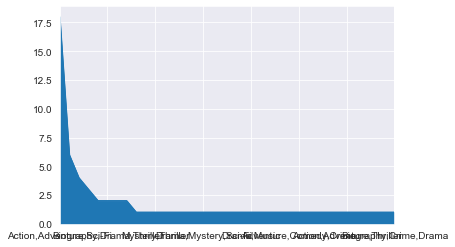

In [987]:
genres_df[genres_df['numvotes'] > 500000].genres.value_counts().plot.area()

In [1054]:
genres_df.describe()

,averagerating,numvotes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
count,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000
mean,6.33273,3523.66217,0.02528,0.01274,0.00451,0.00877,0.03663,0.01660,0.00864,0.06291,0.00356,0.00589,0.00001,0.00471,0.01610,0.00416,0.00083,0.00902,0.00023,0.01668,0.00669,0.00237,0.02227,0.00207,0.00056
std,1.47498,30294.02297,0.15697,0.11216,0.06700,0.09326,0.18784,0.12777,0.09254,0.24280,0.05957,0.07652,0.00368,0.06848,0.12586,0.06434,0.02873,0.09453,0.01517,0.12807,0.08151,0.04862,0.14757,0.04547,0.02355
min,1.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,5.50000,14.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,6.50000,49.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,7.40000,282.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,10.00000,1841066.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


***

## Data Modeling
We will not take the data we've prepared and create visualizations to help answer our initial quesitons. We are open to the possiblity that our assumptions may not hold true and may need adjustments.

***   
##### Q1: What month(s) is it best to release a movie?
After data prep we have a df that contains 5415 movies in descending order of worldwide gross. We'll try different slices to see if there is a strong indication for when the best movies are released. As we've mentioned, we are interested in finding out when people are willing to spend money on movies so we'll focus on the gross. Can we prove that the top grossing movies are more likely to be released in a specific time frame? 

In [711]:
sns.set_style("darkgrid") #set overal styling

#NOTE: wwg is 'worldwide_gross'
#explore possible ways to visualize data for Q1

budgets_wwg['worldwide_gross'].describe()

count         5415.00000
mean      97687996.11468
std      178859114.22000
min             26.00000
25%        7004834.00000
50%       33339868.00000
75%      104459004.00000
max     2776345279.00000
Name: worldwide_gross, dtype: float64

month
2      2
3      5
4      4
5     24
6     18
7     16
8      2
10     1
11    15
12    13
Name: movie, dtype: int64

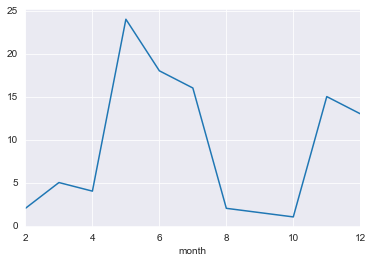

In [712]:
# in what months were the top 100 worldwide grossing movies released?

display(budgets_wwg.head(100).groupby(by = ['month']).count()['movie'])
budgets_wwg.head(100).groupby(by = ['month']).count()['movie'].plot()

month
1      9
2      6
3      8
4      8
5      9
6      6
7      6
8      8
9     11
10    11
11     6
12    12
Name: movie, dtype: int64

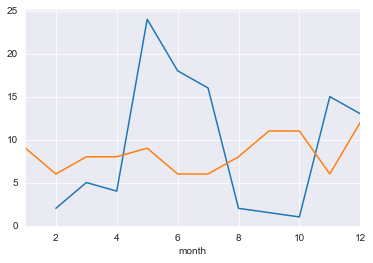

In [713]:
#getting a general feel that certian months stand out
#let's see what the bottom 100 looks like in comparison

display(budgets_wwg.tail(100).groupby(by = ['month']).count()['movie'])

budgets_wwg.head(100).groupby(by = ['month']).count()['movie'].plot()
budgets_wwg.tail(100).groupby(by = ['month']).count()['movie'].plot()

       count          sum
month                    
1         45   8066393566
2         79  19203507298
3         93  27807432828
4         56  17090839105
5        137  60451071987
6        180  61055944002
7        159  54429298654
8         90  19909169932
9         62  12706232163
10        87  17652762499
11       168  56539978498
12       198  62507047314


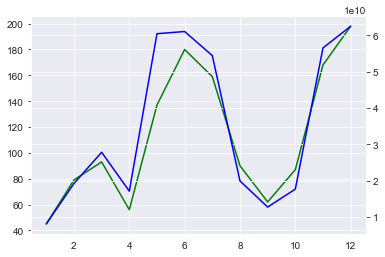

In [714]:
#there's a SLIGHT bump that correlates to when the bottom 100 are released that corresponds to a drop in top 100 releases

#Instead of an arbitrary number like top 100, how about the top 25% in terms of wwg

#what is the count and total wwg for movies per month from the top 25% of wwg
#top 25% determined from .describe
wwg_top25 = budgets_wwg[budgets_wwg['worldwide_gross'] > 104459004].groupby(by = ['month'])['worldwide_gross'].agg(['count','sum'])
print(wwg_top25)

#using twin plot so we can see two different y axis
#let's see what it loks like with the number of movies as well as total wwg

sns.lineplot(data=wwg_top25.iloc[:,0], color="g")
ax2 = plt.twinx()
sns.lineplot(data=wwg_top25.iloc[:,1], color="b", ax=ax2)

In [715]:
#because the wwg and # of movies are closely linked, I think I'm going to go with the number of movies
#I'm interested in depicted what months the top 25% movies and to compare, the bottom 25% as well
#based on .describe() top 25% is above $104,459,004 and bottom 25% is below $7,004,834
#I don't want to use total wwg because that would not be relevant for the bottom 25%

#create dataframe for bottom 25%
wwg_bot25 = budgets_wwg[budgets_wwg['worldwide_gross'] < 7004834].groupby(by = ['month'])['worldwide_gross'].agg(['count', 'sum'])
print(wwg_bot25)


       count        sum
month                  
1         94  167815110
2         90  168260422
3        109  224974246
4        130  236347924
5        104  215343016
6        108  250522647
7         92  173113663
8        133  263197221
9        144  279594365
10       162  355111318
11        74  152307589
12       114  213402281


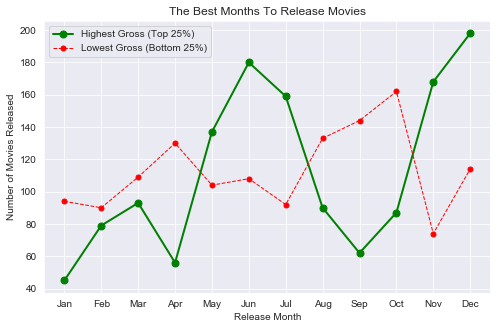

In [716]:
x = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y1 = wwg_top25['count']
y2 = wwg_bot25['count']

plt.figure (figsize=(8,5))
plt.plot(x, y1, color='green', marker='o', linewidth=2, markersize=7, label="Highest Gross (Top 25%)")
plt.plot(x, y2, color='red', marker='o', linestyle='dashed', linewidth=1, markersize=5, label="Lowest Gross (Bottom 25%)")
plt.title('The Best Months To Release Movies')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies Released')
plt.legend()
plt.show()

In [717]:
# a more compelleing graph may have actual $ ceiling and floor instead of percentage

***   
##### Q2: What genre(s) is the most popular in terms of voting engagement?
After data prep we have a dataframe which contains columns for each possible genre with a 1 in place if the movie genre description contains a given genre (or else a 0). We need to find a meaningful threshold for popularity in terms of voting engagement and then determine which genres are most popular in films that garner the most number of votes.

In [1058]:
genres_df.describe()

,averagerating,numvotes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
count,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000,73856.00000
mean,6.33273,3523.66217,0.02528,0.01274,0.00451,0.00877,0.03663,0.01660,0.00864,0.06291,0.00356,0.00589,0.00001,0.00471,0.01610,0.00416,0.00083,0.00902,0.00023,0.01668,0.00669,0.00237,0.02227,0.00207,0.00056
std,1.47498,30294.02297,0.15697,0.11216,0.06700,0.09326,0.18784,0.12777,0.09254,0.24280,0.05957,0.07652,0.00368,0.06848,0.12586,0.06434,0.02873,0.09453,0.01517,0.12807,0.08151,0.04862,0.14757,0.04547,0.02355
min,1.00000,5.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,5.50000,14.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,6.50000,49.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,7.40000,282.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,10.00000,1841066.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [ ]:
genres_df.numvotes.plot.bar()

In [1059]:
genres_df.sum() #check sum of each genre

primary_title    InceptionThe Dark Knight RisesInterstellarDjan...
averagerating                                         467710.00000
numvotes                                                 260243593
Action                                                        1867
Adventure                                                      941
Animation                                                      333
Biography                                                      648
Comedy                                                        2705
Crime                                                         1226
Documentary                                                    638
Drama                                                         4646
Family                                                         263
Fantasy                                                        435
Game-Show                                                        1
History                                                       

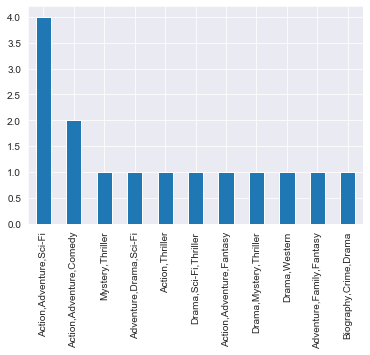

In [1057]:
genres_df[genres_df['numvotes'] > 700000].genres.value_counts().plot.bar()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***


How many of the top movies are part of a franchise?
What is the general reception of video game based movies?